Importação das bibliotecas necessárias

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.io.wavfile import read, write
from scipy.signal import butter, filtfilt, freqs
from numpy.fft import fft, ifft, fftfreq, fftshift
from IPython.display import Audio as play

warnings.filterwarnings("ignore")

Análise dos áudios

In [2]:
play("./01.wav")

In [3]:
play("./02.wav")

#### 1. Ler o arquivo .wav para obter o sinal x[n] em forma de vetor.
#### 2. Plotar o gráfico de x[n] no tempo e de seu espectro de frequência.

In [54]:
# 1. Obtaining x[n] in vector form from 01.wav file.
sample_rate, data = read("./01.wav")
N = len(data)
T = 1/sample_rate
print(f"Número de amostras: {sample_rate}\nTamanho do sinal: {N}")

t = np.arange(0, N/sample_rate, T)
print(f"Vetor tempo: {t}")

# Converting x[n] -> x[jw]
f = fftfreq(N,T)
transf = np.abs(fft(data))

Número de amostras: 44100
Tamanho do sinal: 622173
Vetor tempo: [0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.41081633e+01
 1.41081859e+01 1.41082086e+01]


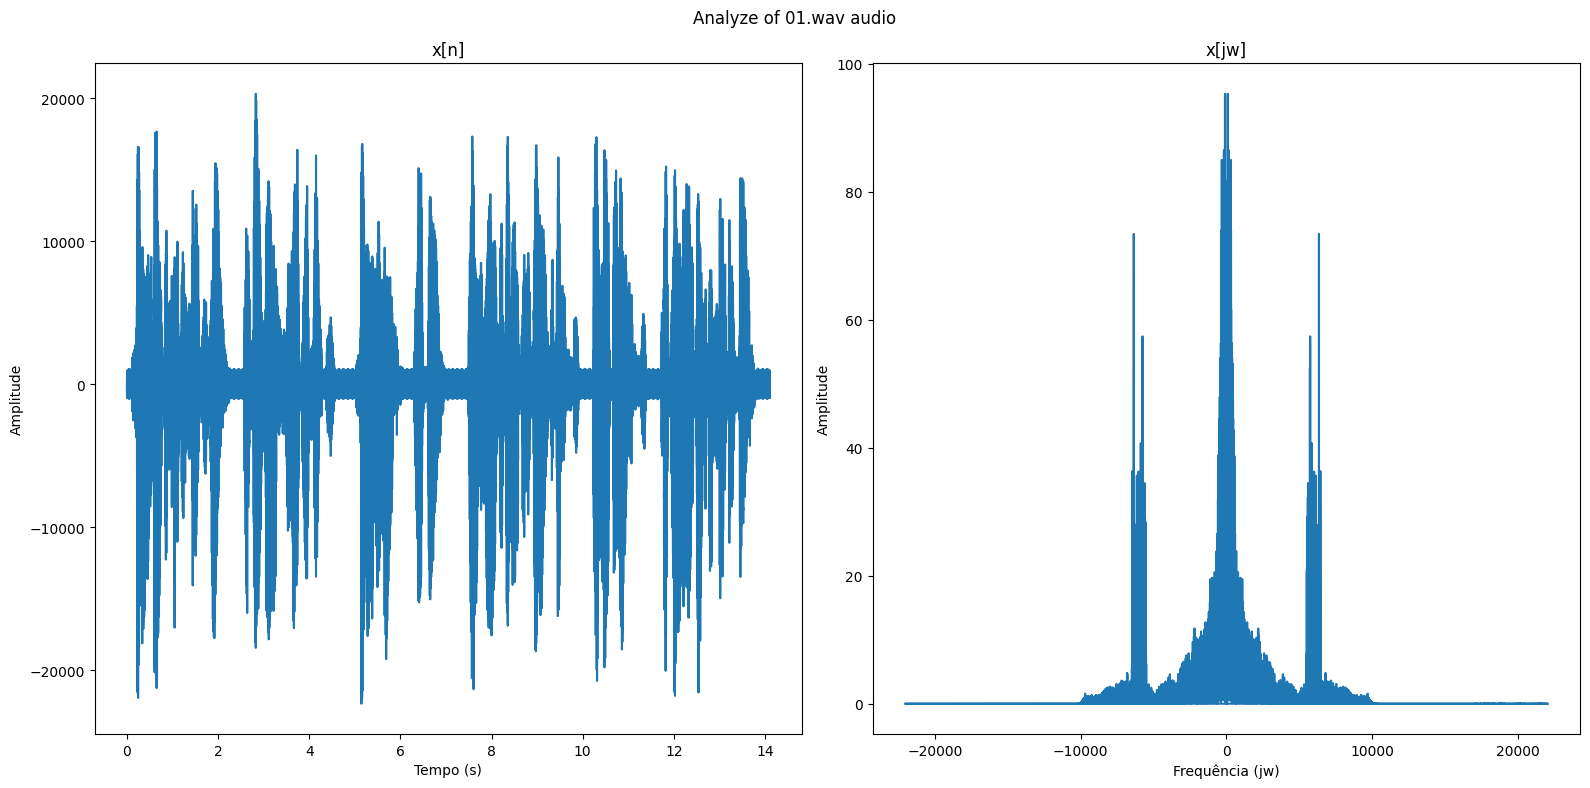

In [55]:
# 2. Plotting graph of signal on time.
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Analyze of 01.wav audio")

ax[0].plot(t, data)
ax[0].set_title("x[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")

ax[1].plot(f, transf/N)
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")

fig.tight_layout()
plt.savefig("./images/01_wav.png")
plt.show()

In [56]:
# 1. Obtaining x[n] in vector form from 01.wav file.
sample_rate_2, data_2 = read("./02.wav")
N_2 = len(data_2)
T_2 = 1/sample_rate_2
print(f"Número de amostras: {sample_rate_2}\nTamanho do sinal: {N_2}")

t_2 = np.arange(0, N_2/sample_rate_2, T_2)
print(f"Vetor tempo: {t_2}")

# Converting x[n] -> x[jw]
f_2 = fftfreq(N_2,T_2)
transf_2 = np.abs(fft(data_2))

Número de amostras: 22050
Tamanho do sinal: 300449
Vetor tempo: [0.00000000e+00 4.53514739e-05 9.07029478e-05 ... 1.36256689e+01
 1.36257143e+01 1.36257596e+01]


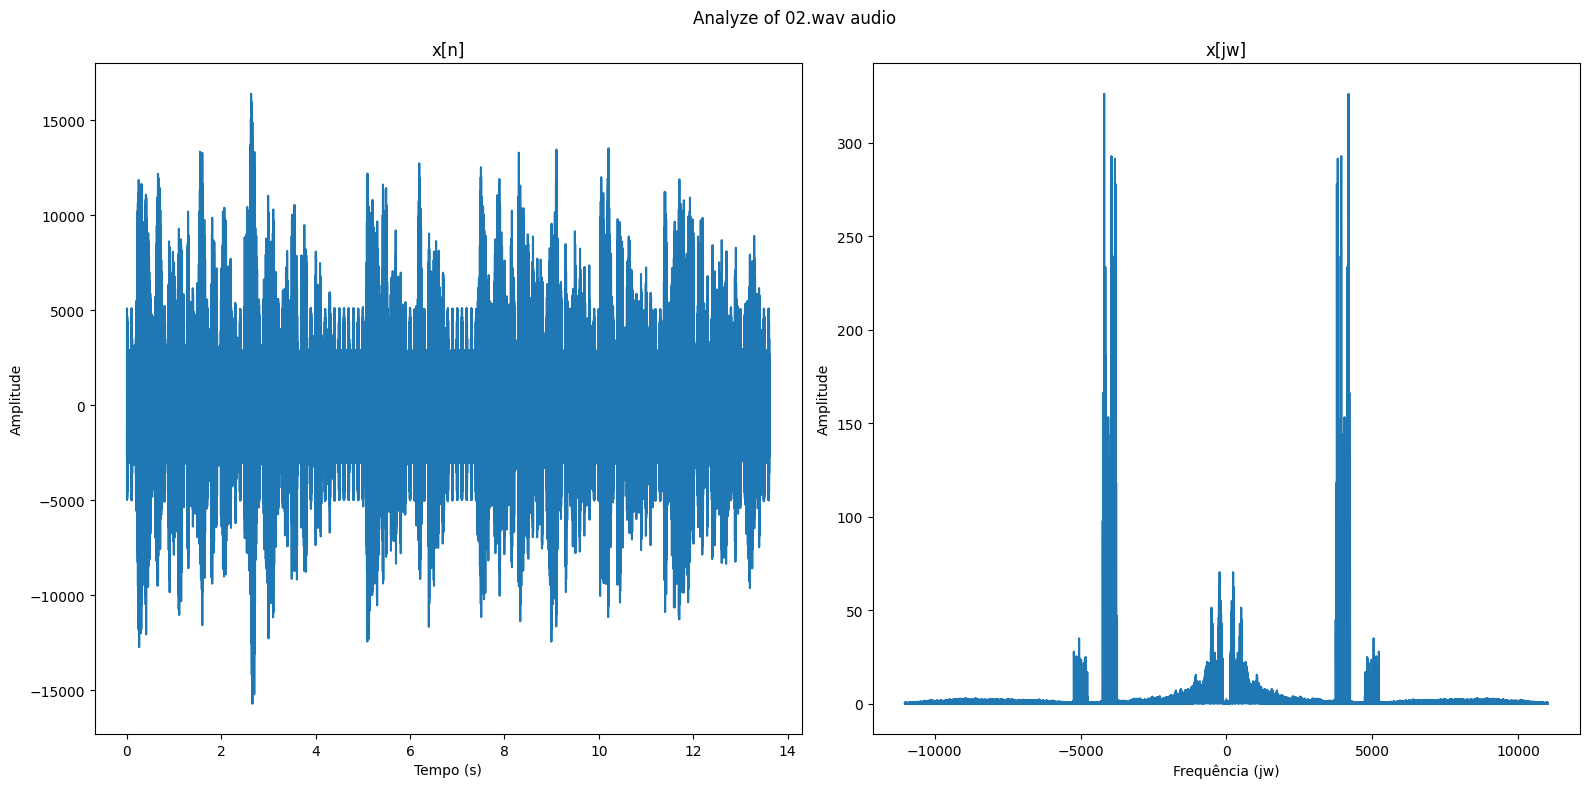

In [57]:
# 2. Plotting graph of signal on time.
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Analyze of 02.wav audio")
fig
ax[0].plot(t_2, data_2)
ax[0].set_title("x[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")

ax[1].plot(f_2, transf_2/N_2)
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")

fig.tight_layout()
plt.savefig("./images/02_wav.png")
plt.show()

#### 3. Implementar o filtro h[n] com os parâmetros ωc e L, tendo como base a fundamentação teórica indicada.
#### 4. Plotar o gráfico de h[n] no tempo, a magnitude e a fase de sua resposta em frequência.

44100 22050


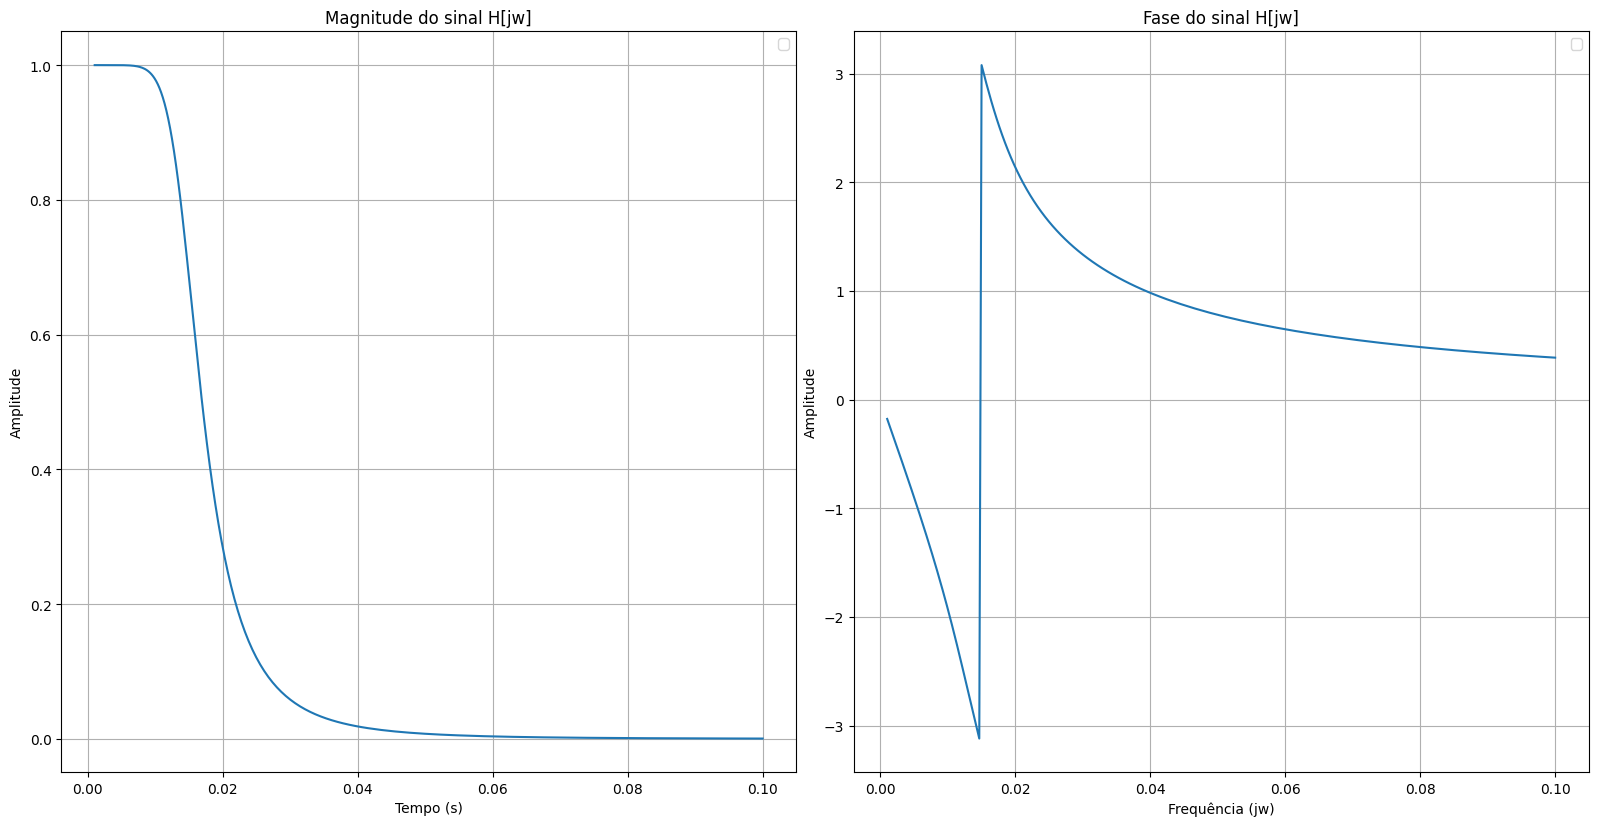

In [82]:
# Filtro h[n]
def low_pass_filter(wc, l, sample_rate):
    # Design low-pass filter
    nyq = 0.5 * sample_rate
    normal_wc = wc/nyq
    b, a = butter(l, normal_wc, btype="lowpass")
    return b, a

print(sample_rate, sample_rate_2)
b, a = butter(4, 1300/sample_rate*0.5, btype='lowpass', analog=True)
w, h = freqs(b, a)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.tight_layout()
ax[0].plot(w, abs(h))
ax[0].set_title("Magnitude do sinal H[jw]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(w, np.angle(h))
ax[1].set_title("Fase do sinal H[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

plt.show()

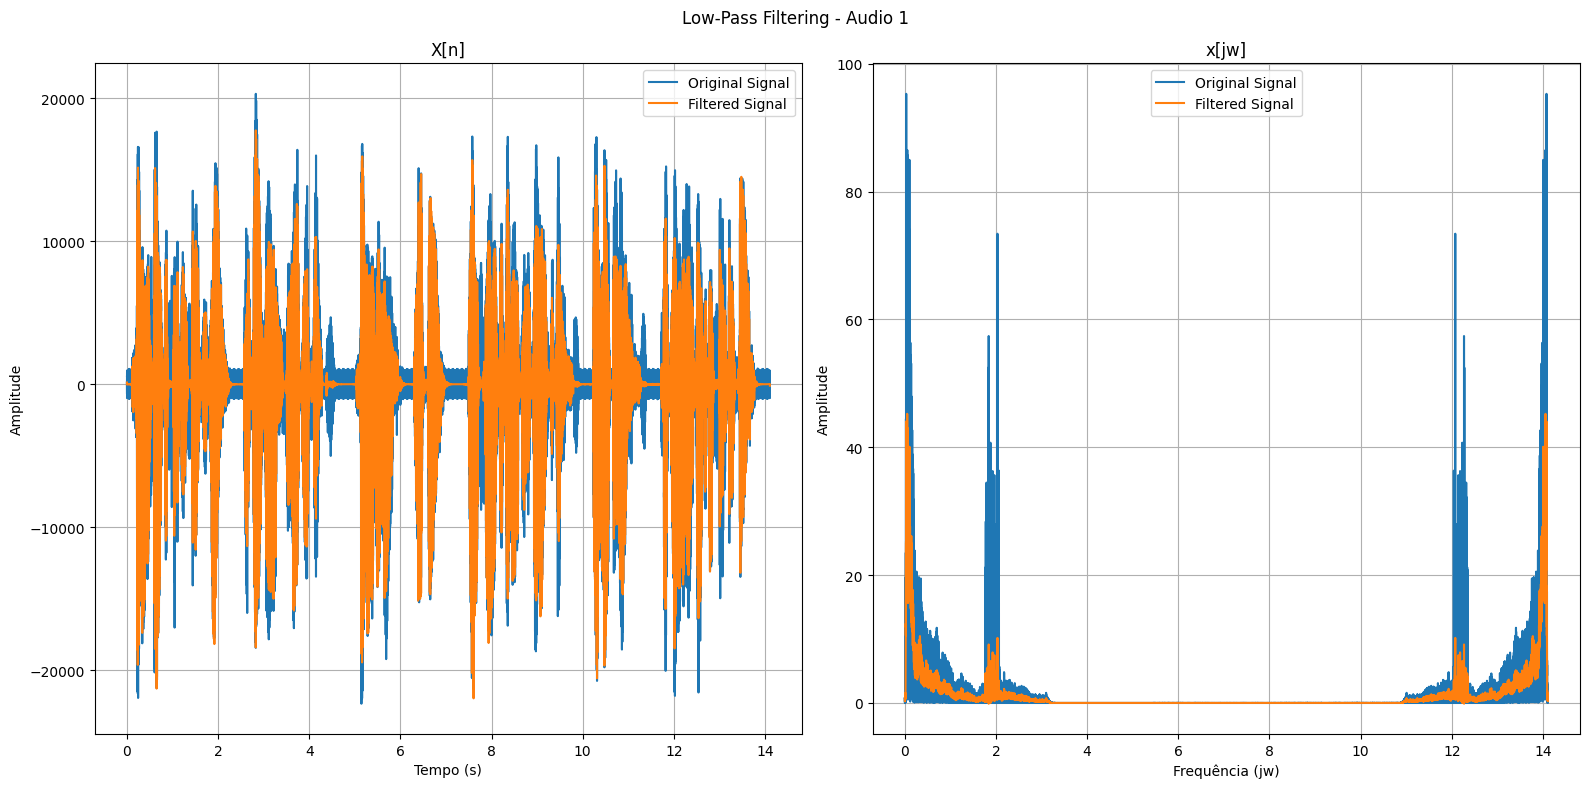

In [ ]:
b, a = low_pass_filter(wc=1300, l=4, sample_rate=sample_rate)

filtered_data = filtfilt(b, a, data)
filtered_transf_data = filtfilt(b, a, transf)
write("01_filtered.wav", sample_rate, filtered_data.astype(np.int16))

# Plot the original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Low-Pass Filtering - Audio 1")
fig.tight_layout()
ax[0].plot(t, data, label="Original Signal")
ax[0].plot(t, filtered_data, label='Filtered Signal')
ax[0].set_title("X[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t, transf/N, label="Original Signal")
ax[1].plot(t, filtered_transf_data/N, label='Filtered Signal')
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()
fig.savefig("./images/01_filtered_signal.png")
plt.show()

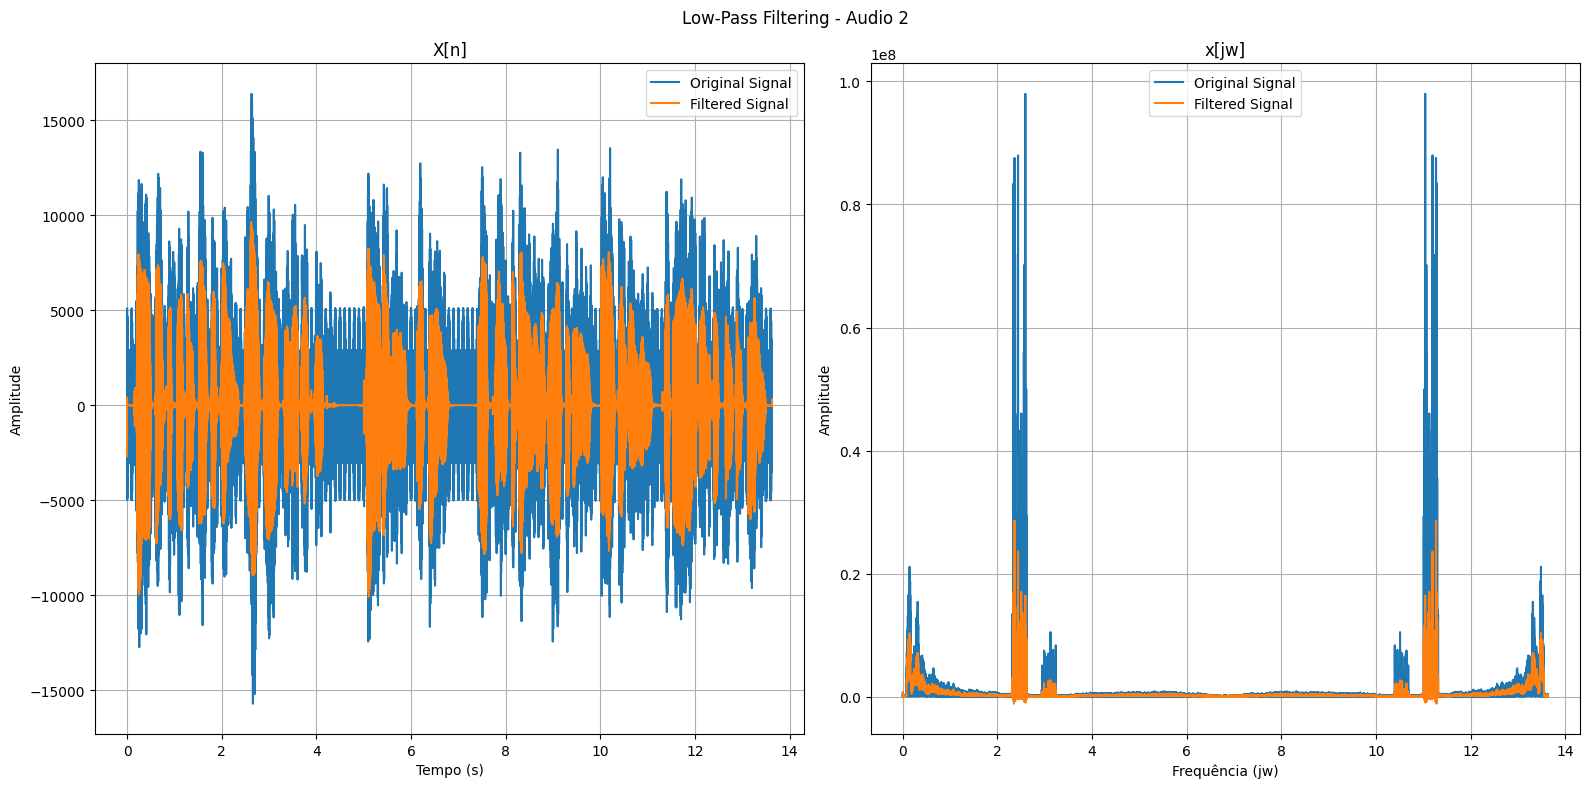

In [ ]:
b_2, a_2 = low_pass_filter(wc=1300, l=4, sample_rate=sample_rate_2)

filtered_data_2 = filtfilt(b_2, a_2, data_2)
filtered_transf_data_2 = filtfilt(b_2, a_2, transf_2)
write("02_filtered.wav", sample_rate_2, filtered_data_2.astype(np.int16))

# Plot the original and filtered data
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Low-Pass Filtering - Audio 2")
fig.tight_layout()
ax[0].plot(t_2, data_2, label="Original Signal")
ax[0].plot(t_2, filtered_data_2, label='Filtered Signal')
ax[0].set_title("X[n]")
ax[0].set_xlabel("Tempo (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(t_2, transf_2, label="Original Signal")
ax[1].plot(t_2, filtered_transf_data_2, label='Filtered Signal')
ax[1].set_title("x[jw]")
ax[1].set_xlabel("Frequência (jw)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].grid(True)

fig.tight_layout()
fig.savefig("./images/02_filtered_signal.png")
plt.show()

In [32]:
play("01_filtered.wav", rate=sample_rate)

In [53]:
play("02_filtered.wav", rate=sample_rate)